## Main goals for analysis:
* Scan duration (each separate scan)
* Number of packets sent/received/overall
* Packets pr. second
* Order of ports scanned
* Payloads

* IP-ID
* Packet size
* TCP Window size
* Sequence number

###### Imports

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import os
import numpy as np

scanner_ip = "192.168.2.230"
scan_title = 'nmap TCP full scan (polite)'
plt.rcParams["figure.figsize"] = (15,10)

###### Read data - output from 'process_pcap_with_payload.py'

In [3]:
directory = '/home/user/notebooks/pcaps/nmap_tcp_full_scan_polite'
scan_list = []

for filename in os.listdir(directory):
    f = os.path.join(directory, filename)
    if os.path.isfile(f):
        filename, ext = os.path.splitext(f)
        if ext == '.csv':
            read = pd.read_csv(f)
            if read.empty:
                pass
            else:
                scan_list.append(read)

## Scan duration

In [5]:
scan_list[0]['time'][-1:]-scan_list[0]['time'][0]

1999    399.987514
Name: time, dtype: float64

In [6]:
duration_list = []
for t in scan_list:
    diff = float(t['time'][-1:]-t['time'][0])
    duration_list.append(diff)
    
scan_times = pd.Series(duration_list, name='Scan times')

In [7]:
scan_times
#duration_list

0    399.987514
1    399.971916
2    399.966626
3    399.973505
4    399.981491
5    399.953735
6    399.975929
7    399.969747
8    399.957865
9    399.952214
Name: Scan times, dtype: float64

In [8]:
temp = pd.DataFrame(duration_list)

In [9]:
temp.mean()

0    399.969054
dtype: float64

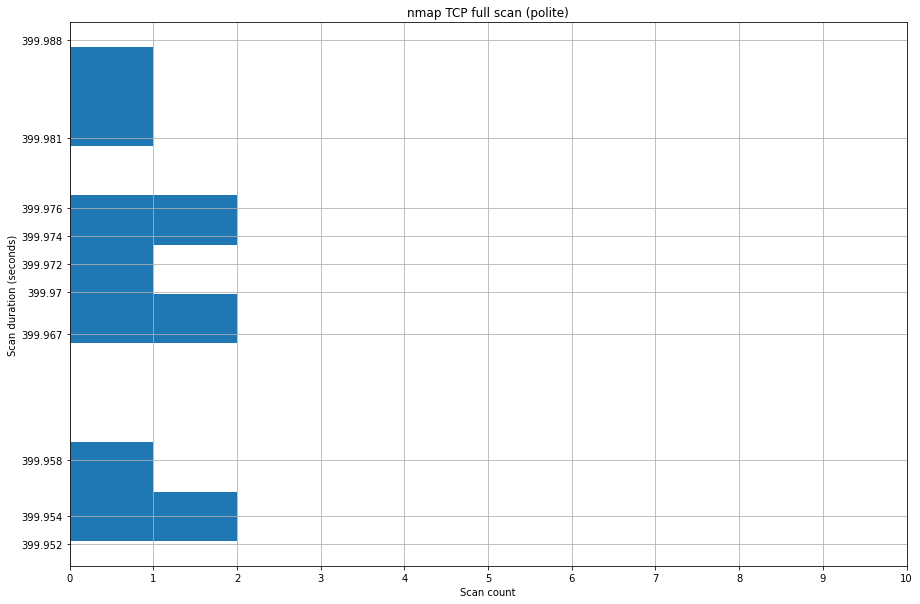

In [10]:
temp.hist(orientation='horizontal')
bin = np.arange(11)
plt.xlabel('Scan count')
plt.ylabel('Scan duration (seconds)')
plt.title(scan_title)
plt.xticks(bin, bin)
yvals = []
for y in duration_list:
    yvals.append(round(y, 3))
        
plt.yticks(yvals, yvals)
plt.savefig(directory + '/Histogram.png')

In [11]:
temp.describe()

0
count   10.000000
mean   399.969054
std      0.011645
min    399.952214
25%    399.960055
50%    399.970832
75%    399.975323
max    399.987514

## Packet count

In [12]:
number_of_scans = len(scan_list)

print(f"Number of scans: {number_of_scans}")

Number of scans: 10


In [13]:
packet_count_overall = 0
src_count = 0
dst_count = 0
total = 0
for scan in scan_list:
    for x in range(0,len(scan)):
        if scan['ip_src'][x] == scanner_ip:
            src_count = src_count+1
            
        elif scan['ip_dst'][x] == scanner_ip:
            dst_count = dst_count+1

        total = total+1


print(f"Overall packet count: {total}")
print(f"Overall sent packets to scanner: {dst_count}")
print(f"Overall received packets from scanner: {src_count}")

Overall packet count: 20000
Overall sent packets to scanner: 10000
Overall received packets from scanner: 10000


## Packets pr. second

In [14]:
avg = float(scan_times.mean())
if avg < 1:
    pps = (total * avg)
else:
    pps = (total / avg)
print(f"Packets pr. second: {pps}")

Packets pr. second: 50.003868521522655



## Order of ports scanned


In [15]:
scannr = []
sport = []
dport = []

for scan in scan_list:
    i = 1
    for x in range(0, len(scan)):
        if scan['ip_src'][x] == scanner_ip:
            if scan['ip_proto'][x] == 6: # tcp
                print(i, scan['tcp_sport'][x], scan['tcp_dport'][x])
                scannr.append(i)
                sport.append(scan['tcp_sport'][x])
                dport.append(scan['tcp_dport'][x])
                i = i+1

orders_port = pd.DataFrame({'scannr': scannr,
                            'sport': sport,
                            'dport': dport
                           })

1 60406 25
2 48694 22
3 55800 23
4 54956 53
5 51802 3306
6 35032 21
7 37736 443
8 57106 587
9 41372 1720
10 50322 256
11 54880 80
12 55930 113
13 58782 110
14 58662 993
15 56428 8888
16 54634 5900
17 59222 8080
18 35368 445
19 33478 199
20 56258 3389
21 33942 139
22 55238 111
23 60576 1025
24 47218 143
25 36736 554
26 33750 1723
27 51212 135
28 51550 995
29 37292 7937
30 53980 1165
31 40764 1001
32 34252 1044
33 53748 4242
34 41536 6667
35 35054 912
36 57154 9485
37 57704 631
38 58190 1086
39 54336 705
40 44564 3878
41 53520 2045
42 51468 19101
43 41292 259
44 57432 18101
45 44456 5030
46 44808 32768
47 38332 1169
48 48848 18040
49 51954 9502
50 43830 3527
51 47272 5802
52 53490 106
53 34332 6112
54 38472 32772
55 41182 3828
56 34032 2004
57 45770 50636
58 43308 541
59 41178 1031
60 57108 4343
61 50606 5087
62 56726 5000
63 47196 481
64 39984 2038
65 33622 458
66 50690 7000
67 59528 2382
68 39810 1026
69 49730 1
70 55588 1300
71 53896 21571
72 58876 8082
73 59748 2557
74 54898 7800
75 

607 47760 1096
608 41070 6901
609 52400 2002
610 44780 6502
611 45066 1500
612 59906 1045
613 51674 9207
614 49706 1111
615 60554 6006
616 43028 30
617 59514 1186
618 51440 2009
619 54152 6101
620 58324 691
621 56382 3971
622 35418 30951
623 48180 125
624 38072 1027
625 38564 1163
626 36708 81
627 38342 616
628 56012 10004
629 55484 3580
630 44776 8193
631 48550 7103
632 48098 1718
633 34036 6646
634 58456 1132
635 46692 8085
636 38202 5432
637 44302 27353
638 34836 1110
639 45072 26214
640 44740 1998
641 58766 4003
642 32962 1023
643 34198 65389
644 60736 8000
645 57734 32778
646 51444 3000
647 59754 1309
648 49116 100
649 45718 3809
650 49402 1059
651 47618 5009
652 44368 880
653 44620 30000
654 43290 1322
655 60720 19780
656 39138 366
657 54468 6689
658 34586 1112
659 55698 1043
660 35642 8009
661 48646 1556
662 50738 5298
663 43890 57294
664 50090 2394
665 58564 20828
666 43102 6000
667 60114 2602
668 57732 1087
669 47052 40193
670 47924 3871
671 34376 515
672 43138 44501
673 44350

204 33534 1087
205 49864 5825
206 41094 50006
207 42430 1029
208 57168 10009
209 54352 10616
210 43588 55056
211 41476 1061
212 60568 6566
213 49670 1443
214 59830 49156
215 50520 5877
216 52252 1600
217 36228 1782
218 59204 32780
219 51380 3030
220 51374 2968
221 50920 8200
222 44674 1034
223 46156 254
224 59934 5298
225 45012 44443
226 57374 6123
227 56752 1059
228 47650 2047
229 56486 3013
230 56834 9003
231 60328 7496
232 40798 4998
233 56748 3517
234 51386 6101
235 34628 1145
236 40214 1027
237 42240 5960
238 32806 1594
239 44750 2604
240 53142 700
241 53664 10001
242 37358 32773
243 44236 6689
244 55744 8090
245 49996 1010
246 54490 5405
247 48760 3001
248 36182 32784
249 43898 20221
250 59138 4443
251 54840 2020
252 44158 1875
253 43780 4002
254 54056 6666
255 45816 1311
256 55084 5906
257 56028 5800
258 33032 1801
259 36982 783
260 42978 5001
261 55332 61900
262 41278 311
263 32804 8649
264 40784 512
265 55198 7435
266 40362 1947
267 43106 20222
268 42766 8021
269 37590 9943
27

774 32810 3367
775 60620 1334
776 44196 1032
777 59096 5566
778 60246 79
779 36496 3476
780 55326 21571
781 60952 2251
782 46788 10566
783 52166 9103
784 54724 8300
785 34228 1524
786 44474 648
787 37434 3077
788 40420 14441
789 52990 13
790 37498 5414
791 36636 5000
792 43428 5987
793 48926 255
794 49228 1761
795 41946 4045
796 33998 27352
797 51760 541
798 43226 12345
799 51662 2394
800 32990 1166
801 40318 85
802 59026 5907
803 43696 9200
804 42128 6543
805 43418 616
806 44554 19
807 45238 2065
808 42918 1102
809 58456 8652
810 36744 8701
811 54700 1175
812 38668 5988
813 54678 1131
814 47044 32774
815 53192 8254
816 57820 10215
817 37640 1721
818 43704 6502
819 56120 726
820 53246 3371
821 51938 8333
822 47700 2710
823 44692 9001
824 54218 2010
825 43692 843
826 59662 1011
827 51820 65389
828 44142 880
829 39362 33899
830 38042 5190
831 54182 5100
832 60890 6567
833 53232 1309
834 38924 8994
835 60836 1461
836 52352 10012
837 40458 57294
838 55112 1130
839 60530 2119
840 55524 5999

773 53162 32779
774 35986 1862
775 39436 2718
776 50848 50000
777 46372 28201
778 49616 3690
779 55234 4321
780 48514 20031
781 44218 17877
782 53974 5922
783 48098 5963
784 53858 49999
785 36848 5560
786 55070 6004
787 41066 1217
788 47618 1718
789 48492 389
790 60032 3301
791 38602 2045
792 35738 1583
793 53120 1026
794 42486 85
795 59060 2869
796 34222 16000
797 35504 301
798 41276 2710
799 59834 1138
800 51150 8300
801 34086 5101
802 35802 63331
803 49742 62078
804 51178 903
805 38364 254
806 36232 2200
807 45124 5800
808 36416 9595
809 52522 15003
810 36782 8873
811 52034 465
812 46388 1972
813 44166 2800
814 49684 6779
815 50186 1163
816 52344 1301
817 56772 42
818 56242 3030
819 37148 1084
820 49978 10003
821 60270 1108
822 48990 15000
823 59322 1123
824 52942 5214
825 36848 2035
826 55120 705
827 40198 5190
828 41832 4242
829 37876 13
830 55608 23502
831 34272 2608
832 43698 3826
833 51452 2604
834 45940 2049
835 57362 58080
836 47818 81
837 53964 2099
838 60260 1311
839 38484 

821 37124 1782
822 51904 3737
823 51568 88
824 33770 406
825 46166 5003
826 45562 6004
827 53658 264
828 49808 4848
829 47146 1259
830 48020 5877
831 60370 27352
832 54594 2003
833 56978 3546
834 55080 14441
835 34268 18101
836 51224 8011
837 48840 14238
838 49696 1098
839 56118 1022
840 33454 2068
841 41174 4111
842 39864 32778
843 43242 8088
844 54024 3283
845 46260 2525
846 55540 749
847 42200 1296
848 60930 7103
849 41214 84
850 58024 10025
851 39530 106
852 55766 465
853 58458 49
854 44738 5001
855 49506 5963
856 41282 4445
857 53556 2190
858 42124 9594
859 41676 1113
860 58078 2045
861 33430 3322
862 60510 3000
863 55214 32777
864 58944 1433
865 39992 2013
866 36292 8093
867 41352 1174
868 47182 26
869 34768 34572
870 57826 5280
871 60958 301
872 42506 8192
873 37968 4279
874 39402 3920
875 43550 49176
876 36210 4005
877 41018 616
878 37188 1059
879 36628 5910
880 53720 1068
881 45932 9898
882 38524 340
883 44250 900
884 37748 7627
885 38132 1216
886 58722 64623
887 33424 4
888 5

439 37790 1056
440 49232 57294
441 50780 32785
442 60146 3300
443 50718 5221
444 56124 6792
445 53768 3766
446 56810 1187
447 33502 6565
448 36846 9917
449 41922 5811
450 57158 33354
451 34994 1322
452 47828 3880
453 41996 2809
454 53326 3269
455 50816 1947
456 60124 1032
457 37590 1151
458 41228 1100
459 58816 5810
460 33030 5915
461 48582 9080
462 51366 27355
463 46078 3659
464 55444 211
465 50622 1137
466 49404 1088
467 47860 10024
468 43994 15004
469 42704 10243
470 34352 2021
471 38794 1935
472 33358 4
473 47342 18988
474 58034 8400
475 50456 8082
476 46322 6543
477 41530 1801
478 44756 306
479 38672 8007
480 42648 32778
481 35276 12000
482 43420 2001
483 52336 62078
484 42136 481
485 42568 2601
486 51362 3260
487 60622 9103
488 58016 31038
489 54958 1089
490 35118 1070
491 59666 1218
492 36482 6510
493 41238 2068
494 54282 1049
495 42304 1148
496 40706 9535
497 49034 9943
498 43538 1072
499 49242 9418
500 55170 2160
501 41130 1091
502 44932 8222
503 38042 16001
504 42832 3268
505

106 50550 2717
107 39158 16080
108 46508 2007
109 36016 5222
110 35018 1110
111 44626 563
112 50956 4002
113 54066 2005
114 39034 5822
115 52060 1083
116 32768 51493
117 56922 306
118 57232 1082
119 39448 1148
120 35426 16016
121 53566 34572
122 34996 6792
123 48866 1049
124 48610 16993
125 51642 52848
126 56344 5877
127 39090 5998
128 53750 3013
129 55698 3580
130 44772 1149
131 40390 1864
132 58794 14000
133 49246 1183
134 42630 2022
135 37644 1032
136 48890 61900
137 54332 1580
138 54802 9998
139 56740 1067
140 57026 5000
141 48798 7103
142 33892 458
143 45896 3809
144 33628 1201
145 53414 1433
146 46518 1461
147 60290 10778
148 55432 10215
149 43464 1322
150 41058 1001
151 44778 4567
152 37552 1151
153 52830 49153
154 49598 2010
155 35646 1089
156 34568 2725
157 53828 2045
158 51912 5904
159 45942 5989
160 50926 5298
161 59016 63331
162 45342 5922
163 34250 2004
164 36168 1761
165 52270 3011
166 39768 1007
167 33348 2047
168 60276 1037
169 34006 8021
170 50104 8994
171 40796 2200
1

656 58066 7920
657 60290 2602
658 58098 2049
659 57748 9220
660 36238 873
661 47732 7007
662 49764 3031
663 41420 3300
664 35454 1147
665 55224 6100
666 50860 33354
667 52022 2170
668 43424 9099
669 37744 1062
670 55116 254
671 47722 512
672 35380 636
673 56214 10004
674 41676 3333
675 39230 49156
676 56892 1138
677 38450 8180
678 38688 2020
679 50544 2099
680 57048 417
681 48066 1801
682 51866 19101
683 46540 32782
684 60358 1311
685 51898 903
686 38410 1999
687 36468 1131
688 46722 11111
689 33064 1174
690 58652 691
691 48932 1556
692 57372 9485
693 39344 2393
694 36142 33899
695 35472 8042
696 39072 2105
697 33942 32779
698 54808 8045
699 55744 1094
700 45168 5102
701 54348 5061
702 38150 9929
703 42142 6789
704 60704 25735
705 48268 2100
706 53880 1199
707 60920 3283
708 35532 9943
709 35150 49176
710 52016 32769
711 56322 3372
712 40092 9111
713 43668 5631
714 42420 6669
715 53646 981
716 41184 49999
717 42086 5060
718 41568 3801
719 54620 10617
720 57818 3390
721 34820 722
722 43

272 51754 5633
273 45188 1009
274 36316 5850
275 48732 1068
276 43998 465
277 54766 1247
278 47102 545
279 39928 254
280 52592 1234
281 56436 636
282 38860 2009
283 56836 32785
284 37964 179
285 53480 1334
286 47686 19350
287 40726 8083
288 44974 85
289 37656 301
290 34514 1301
291 35974 2047
292 33508 4662
293 55912 49175
294 33634 1185
295 56680 1972
296 50832 1100
297 50038 44501
298 41612 9003
299 45296 50800
300 40920 1011
301 42738 1041
302 32844 8292
303 43814 5222
304 48366 61532
305 55744 3766
306 49286 8090
307 44886 8290
308 45624 9502
309 58518 10003
310 42032 19842
311 38560 2003
312 57586 5555
313 55190 16080
314 47472 2725
315 59356 5003
316 41222 1010
317 35836 7741
318 35650 2020
319 46694 1093
320 58136 1199
321 57888 8994
322 60166 1040
323 52808 6669
324 49626 3001
325 45634 5054
326 52840 1036
327 33692 50003
328 54940 20031
329 41846 19780
330 54948 9929
331 54982 1721
332 41664 7938
333 47196 15660
334 60512 2041
335 51224 5679
336 55250 3005
337 39928 3367
338 4

439 43316 2522
440 44058 3801
441 36148 2068
442 39436 10010
443 56474 9003
444 60556 9593
445 37964 787
446 55154 2033
447 38748 1501
448 58730 1055
449 58750 2638
450 41964 5960
451 35594 543
452 58348 1259
453 38484 89
454 53232 901
455 42470 1102
456 54234 6669
457 37190 1721
458 55826 1192
459 50790 1089
460 59618 1066
461 38724 4
462 45520 3211
463 46268 2046
464 35294 1556
465 43374 2702
466 33678 1972
467 44300 1034
468 60266 1334
469 39940 8600
470 41814 119
471 41012 3766
472 40236 1183
473 41954 898
474 39768 9011
475 47252 7777
476 36602 3005
477 44742 2399
478 46716 32774
479 42448 11110
480 36866 465
481 59034 7443
482 47422 20005
483 60590 8088
484 47886 83
485 45750 497
486 58930 8087
487 39016 389
488 48746 88
489 56556 32775
490 42688 27353
491 53368 10082
492 51402 1658
493 56608 1218
494 42852 5004
495 50078 3914
496 60618 44176
497 33654 100
498 44528 50002
499 36048 6646
500 54416 25735
501 33572 49176
502 51030 2725
503 47616 6112
504 43770 5718
505 56036 1068
50

105 40578 2190
106 44142 4998
107 50214 5911
108 36322 687
109 37846 1045
110 52260 32781
111 48426 65389
112 56368 264
113 54248 5432
114 59356 49160
115 55616 19842
116 43038 9595
117 52230 1131
118 38792 8100
119 36608 1083
120 41980 32784
121 44110 16992
122 60920 514
123 49908 1080
124 58038 3880
125 42038 3826
126 54170 18040
127 57286 40911
128 34636 9081
129 55094 1097
130 48082 1000
131 38772 20
132 33434 2008
133 34890 6006
134 51856 5555
135 41240 425
136 36740 1164
137 58822 5800
138 49266 8082
139 39276 5080
140 35130 99
141 51090 407
142 57290 2260
143 59046 1521
144 57580 1583
145 46644 32770
146 44102 9001
147 42216 1688
148 41272 2809
149 59722 625
150 41588 1145
151 35330 8333
152 39848 1914
153 32862 3905
154 51592 20031
155 35856 1126
156 59510 64623
157 43098 55600
158 50530 668
159 37884 9929
160 50322 7025
161 33976 5226
162 33536 1119
163 54334 6667
164 41014 563
165 48292 3324
166 46412 5825
167 59010 8087
168 45798 2382
169 48840 9220
170 44032 10082
171 59424

271 46392 10000
272 37378 3007
273 40040 264
274 37672 2557
275 34626 3871
276 34518 5811
277 56806 4900
278 46670 32773
279 46258 2492
280 59254 1152
281 42546 5550
282 49256 512
283 39804 8001
284 46490 6666
285 41340 7625
286 35504 7741
287 34254 1301
288 37526 5730
289 52406 1165
290 52492 5915
291 40112 2920
292 53614 17988
293 48486 1068
294 48684 1166
295 58678 1145
296 46398 3211
297 36742 9618
298 46506 2161
299 59020 1494
300 36128 3851
301 42174 9666
302 49070 2007
303 35544 1111
304 37414 1046
305 53984 1104
306 36108 787
307 47198 1309
308 46700 5214
309 49240 1122
310 56050 1083
311 46834 9099
312 33226 1984
313 59944 9503
314 55114 5050
315 44710 20828
316 46426 3077
317 49762 1233
318 58904 8007
319 36612 2005
320 46700 5061
321 38310 7070
322 59878 6
323 52646 5001
324 35834 2717
325 47402 19350
326 33364 1185
327 37694 8002
328 40118 1071
329 35356 2020
330 49092 222
331 49270 3001
332 42828 8099
333 35708 2047
334 37426 301
335 60840 3551
336 34050 1352
337 49924 203

938 48150 2998
939 35942 65129
940 59552 6788
941 58588 54328
942 59146 563
943 37998 3323
944 50960 7999
945 54212 34573
946 36650 3880
947 47292 2002
948 39396 49167
949 41570 3918
950 38680 2009
951 37370 5877
952 50614 1039
953 50446 1875
954 34728 9968
955 45448 2604
956 41230 8010
957 54996 2968
958 37686 1138
959 33174 11111
960 41604 8800
961 60878 3493
962 54228 687
963 45310 1192
964 47106 10004
965 48804 5952
966 39890 9110
967 58578 56738
968 59126 5003
969 34852 15004
970 37206 50500
971 49166 992
972 51880 700
973 45162 2103
974 44086 8400
975 57224 9002
976 34962 8651
977 34486 1501
978 42842 1078
979 59886 1062
980 49572 19801
981 57932 5959
982 50874 9877
983 45400 5054
984 49842 17877
985 55248 888
986 35378 1032
987 51612 15742
988 55248 1971
989 60446 106
990 36518 1038
991 58650 1089
992 41158 9535
993 32870 27353
994 46136 1271
995 55992 513
996 40644 902
997 54424 722
998 47390 42
999 57716 40193
1000 52078 7800


In [16]:
orders_port

scannr  sport  dport
0          1  60406     25
1          2  48694     22
2          3  55800     23
3          4  54956     53
4          5  51802   3306
...      ...    ...    ...
9995     996  40644    902
9996     997  54424    722
9997     998  47390     42
9998     999  57716  40193
9999    1000  52078   7800

[10000 rows x 3 columns]

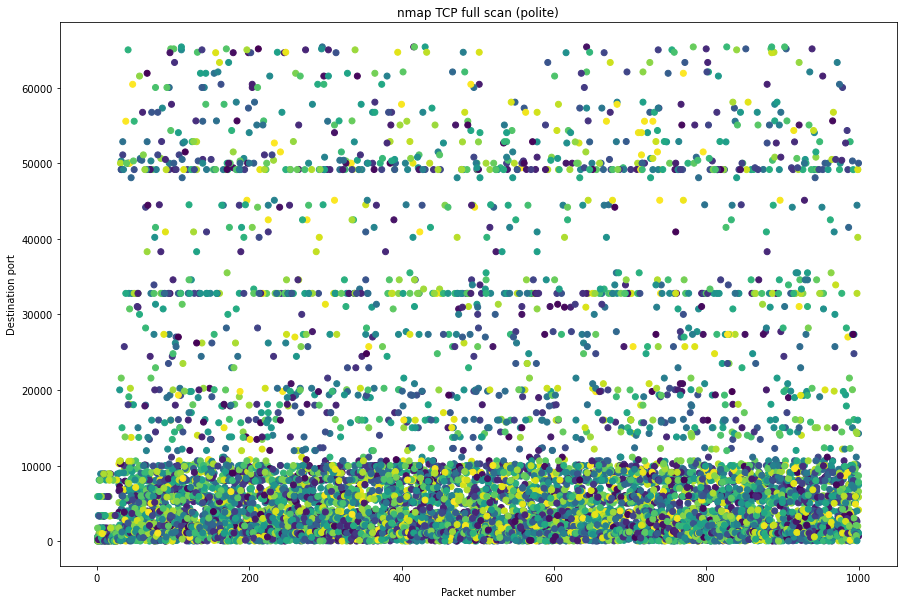

In [17]:
plt.xlabel('Packet number')
plt.ylabel('Destination port')
plt.title(scan_title)
plt.scatter(x='scannr', y='dport', c='sport', data=orders_port)
plt.savefig(directory + '/DstPacketNr.png')

In [18]:
#orders_port.set_index('scannr', inplace=True)
#orders_port.groupby('sport')['dport'].plot(legend=True)
#plt.xlabel('Packet number')
#plt.ylabel('Destination ports')
#plt.title(scan_title)

In [19]:
tcp_sports = []
tcp_dports = []
payloads = []
run = []
i = 1

for row in scan_list:
    for x in range(0, len(row)):
        if row['ip_src'][x] == scanner_ip:
            if scan['ip_proto'][x] == 6: # tcp
                tcp_sports.append(row['tcp_sport'][x])
                tcp_dports.append(row['tcp_dport'][x])
                run.append(i)
            payloads.append(row['payload'][x])

    i = i+1
payloads = pd.DataFrame(payloads)

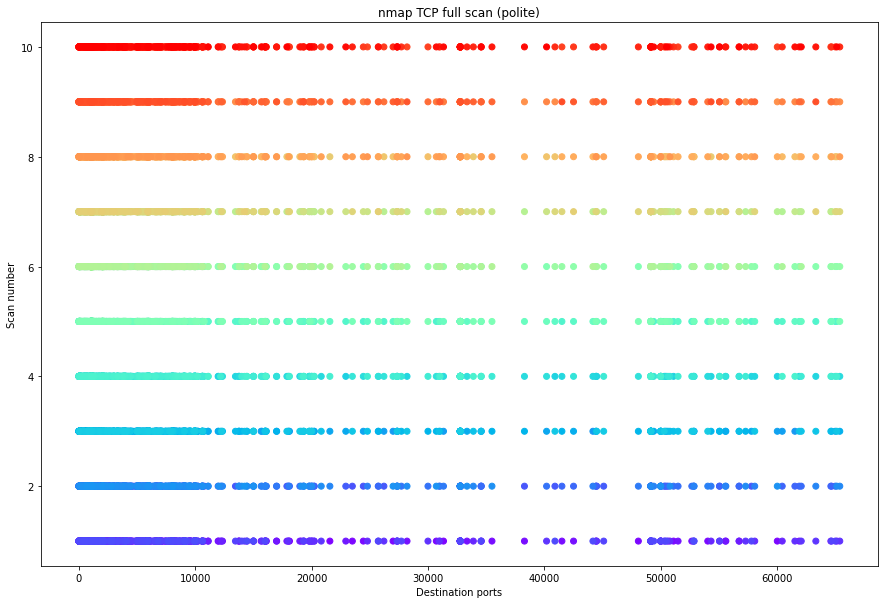

In [20]:
y = run
x = tcp_dports
colors = cm.rainbow(np.linspace(0, 1, len(y)))
plt.ylabel('Scan number')
plt.xlabel('Destination ports')
plt.title(scan_title)
plt.scatter(x, y, color=colors)
plt.savefig(directory + '/ScanNrDstPort.png')
plt.show()

## Payloads

In [21]:
payloads.value_counts()

Series([], dtype: int64)

## IP-ID

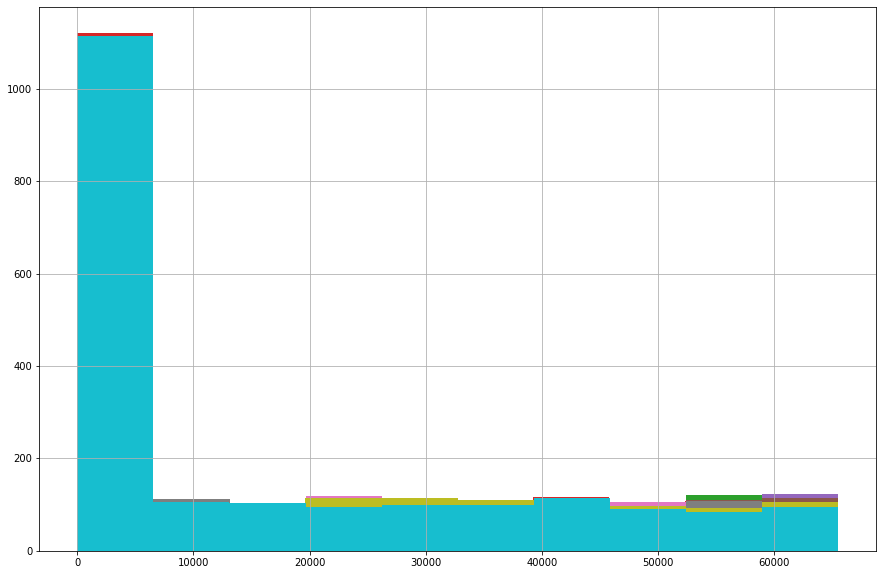

In [25]:
for scan in scan_list:
    for x in range(0, len(scan)):
        if scan['ip_src'][x] == scanner_ip:
            pass
    
    scan['ip_id'].hist()

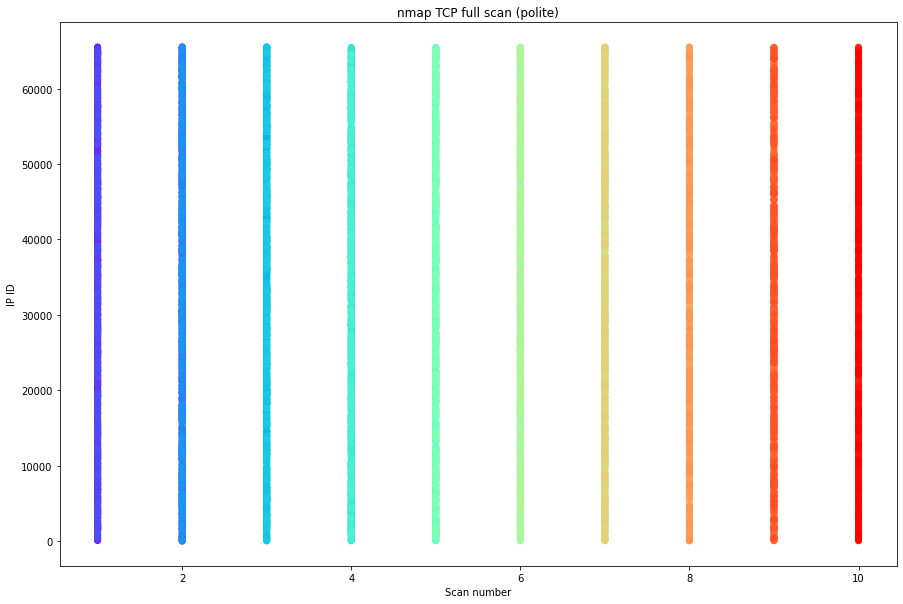

In [26]:
ip_ids = []
scan_number = []
scan_nr = 0

for row in scan_list:
    scan_nr = scan_nr + 1
    for x in range(0, len(row)):
        if row['ip_src'][x] == scanner_ip:
            ip_ids.append(row['ip_id'][x])
            scan_number.append(scan_nr)



x = scan_number
ys = ip_ids
colors = cm.rainbow(np.linspace(0, 1, len(ys)))
plt.xlabel('Scan number')
plt.ylabel('IP ID')
plt.title(scan_title)
plt.scatter(x, ys, color=colors)
plt.savefig(directory + '/IPIDScanNr.png')
plt.show()


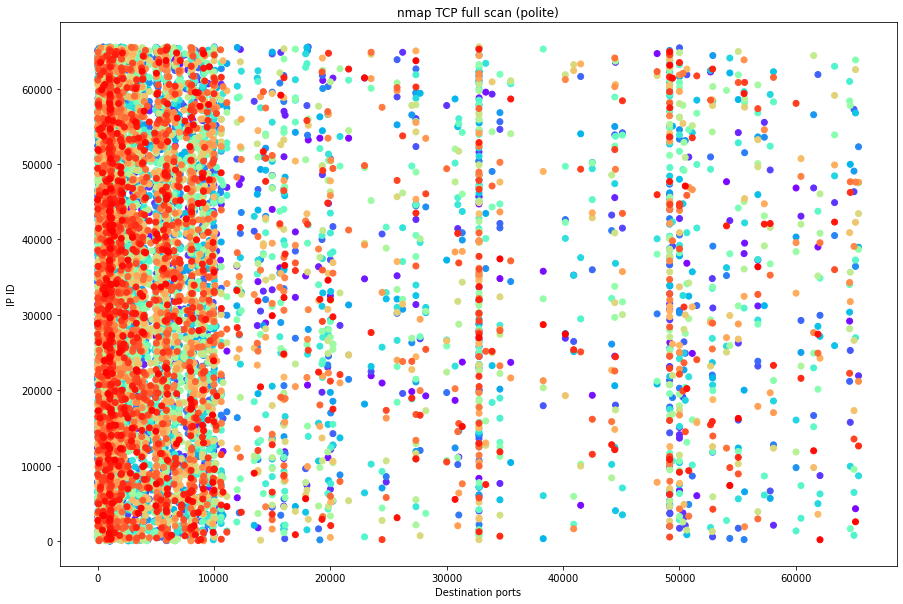

In [27]:
ip_ids = []
scan_number = []
dst_ports = []

for row in scan_list:
    for x in range(0, len(row)):
        if row['ip_src'][x] == scanner_ip:
            ip_ids.append(row['ip_id'][x])
            if scan['ip_proto'][x] == 6: # tcp
                dst_ports.append(row['tcp_dport'][x])

if dst_ports:
    x = dst_ports
    ys = ip_ids
    colors = cm.rainbow(np.linspace(0, 1, len(ys)))
    plt.xlabel('Destination ports')
    plt.ylabel('IP ID')
    plt.title(scan_title)
    plt.scatter(x, ys, color=colors)
    plt.savefig(directory + '/IPIDDstPort.png')
    plt.show()

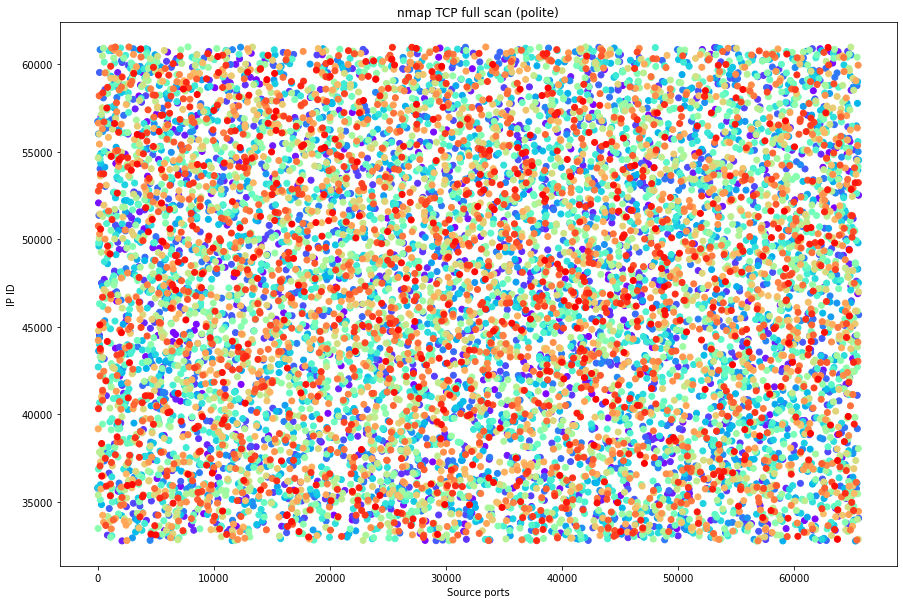

In [28]:
ip_ids = []
scan_number = []
src_ports = []

for row in scan_list:
    for x in range(0, len(row)):
        if row['ip_src'][x] == scanner_ip:
            ip_ids.append(row['ip_id'][x])
            if scan['ip_proto'][x] == 6: # tcp
                src_ports.append(row['tcp_sport'][x])

if src_ports:
    ys = src_ports
    x = ip_ids
    colors = cm.rainbow(np.linspace(0, 1, len(ys)))
    plt.xlabel('Source ports')
    plt.ylabel('IP ID')
    plt.title(scan_title)
    plt.scatter(x, ys, color=colors)
    plt.savefig(directory + '/IPIDSrcPort.png')
    plt.show()

## Packet size
Calculate 'Packet size' - note that this is only ip + udp/icmp/tcp (no ethernet header included in the calculation)

In [29]:
for scan in scan_list:
    for x in range(0, len(scan)):
        if scan['ip_src'][x] == scanner_ip:
            
            if scan['ip_proto'][x] == 6: # tcp
                packet_size = scan['ip_len'][x]
            elif scan['ip_proto'][x] == 14: # udp
                packet_size = scan['ip_len'][x] + scan['udp_len'][x]
            elif scan['ip_proto'][x] == 1: # icmp
                packet_size = scan['ip_len'][x] + scan['icmp_len'][x]
            else:
                packet_size = None

            if packet_size:
                print(f"Packet length: {packet_size}")
            
    print("-----")

Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet len

Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet len

Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet len

Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet len

Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet len

Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet len

Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet len

Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet len

## TCP Window size

In [30]:
for scan in scan_list:
    for x in range(0, len(scan)):
        if scan['ip_src'][x] == scanner_ip:
            
            if scan['ip_proto'][x] == 6: # tcp
                window_size = scan['tcp_window'][x]
            else:
                window_size = None
                
            if window_size:
                print(f"Window size: {window_size}")
            
    print("-----")

Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size:

Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size:

Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size:

Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size:

Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size:

Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size:

Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size:

Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size:

Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size:

Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size:

Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size:

Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size:

Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size:

## Sequence number


In [31]:
for scan in scan_list:
    for x in range(0, len(scan)):
        if scan['ip_src'][x] == scanner_ip:
            
            if scan['ip_proto'][x] == 6: # tcp
                sequence_nr = scan['tcp_seq'][x]
            elif scan['ip_proto'][x] == 1: # icmp
                sequence_nr = scan['icmp_seq'][x]
            else:
                sequence_nr = None
                
            if sequence_nr:
                print(f"Sequence number: {sequence_nr}")
            
    print("-----")

Sequence number: 2894008004
Sequence number: 1742241078
Sequence number: 1605944880
Sequence number: 4160395125
Sequence number: 3286349257
Sequence number: 1513783903
Sequence number: 314612218
Sequence number: 1594822702
Sequence number: 2761670640
Sequence number: 3541906205
Sequence number: 2231875311
Sequence number: 1393433155
Sequence number: 1050815655
Sequence number: 3525918012
Sequence number: 1425536479
Sequence number: 3312440019
Sequence number: 3128636620
Sequence number: 66328781
Sequence number: 3038178763
Sequence number: 1757998016
Sequence number: 1428521791
Sequence number: 2787171180
Sequence number: 3321641977
Sequence number: 1115091270
Sequence number: 187177593
Sequence number: 997246688
Sequence number: 3797586151
Sequence number: 3030911472
Sequence number: 89144348
Sequence number: 1583826410
Sequence number: 4222537364
Sequence number: 1034412073
Sequence number: 2376809222
Sequence number: 1331967582
Sequence number: 505672064
Sequence number: 4268168699


Sequence number: 3903766303
Sequence number: 99841794
Sequence number: 4192372894
Sequence number: 3477495634
Sequence number: 2053879919
Sequence number: 4010274645
Sequence number: 1745260986
Sequence number: 126694086
Sequence number: 3146349252
Sequence number: 375546008
Sequence number: 693313755
Sequence number: 902142221
Sequence number: 2178713095
Sequence number: 3211790057
Sequence number: 3850503181
Sequence number: 2116225171
Sequence number: 3271296167
Sequence number: 4053834394
Sequence number: 2797322060
Sequence number: 4136938303
Sequence number: 3106107862
Sequence number: 4084640917
Sequence number: 1786261784
Sequence number: 4025938683
Sequence number: 4070905696
Sequence number: 2635914352
Sequence number: 1215402496
Sequence number: 2629859052
Sequence number: 3495289973
Sequence number: 986219825
Sequence number: 3035529891
Sequence number: 2788020297
Sequence number: 428678305
Sequence number: 2576778281
Sequence number: 1337981224
Sequence number: 2726793651


Sequence number: 4165499709
Sequence number: 1728547357
Sequence number: 212061810
Sequence number: 1078670499
Sequence number: 1447675159
Sequence number: 2656764398
Sequence number: 294925480
Sequence number: 768810486
Sequence number: 385632494
Sequence number: 604569027
Sequence number: 8945022
Sequence number: 3976573429
Sequence number: 2981980916
Sequence number: 2675747437
Sequence number: 655506361
Sequence number: 3135993887
Sequence number: 1218857509
Sequence number: 4214436219
Sequence number: 137702203
Sequence number: 3084677328
Sequence number: 2273542496
Sequence number: 2570257177
Sequence number: 4292982722
Sequence number: 2878393208
Sequence number: 3372926196
Sequence number: 4048135493
Sequence number: 743822442
Sequence number: 3073782001
Sequence number: 2485414140
Sequence number: 1119580453
Sequence number: 624735454
Sequence number: 873022488
Sequence number: 3567715305
Sequence number: 2114331075
Sequence number: 1731385546
Sequence number: 1976984441
Seque

Sequence number: 2051125637
Sequence number: 2246287835
Sequence number: 2246110803
Sequence number: 3530731932
Sequence number: 2156628658
Sequence number: 1073617760
Sequence number: 2108237104
Sequence number: 1667279890
Sequence number: 1474056333
Sequence number: 4058660164
Sequence number: 1867260147
Sequence number: 2532871595
Sequence number: 3539833284
Sequence number: 2411528770
Sequence number: 449989728
Sequence number: 2813025855
Sequence number: 1494795749
Sequence number: 1577682706
Sequence number: 162598738
Sequence number: 540419473
Sequence number: 1513167582
Sequence number: 1862362446
Sequence number: 1657996568
Sequence number: 1100042595
Sequence number: 1148747821
Sequence number: 3379516342
Sequence number: 1891721590
Sequence number: 571889123
Sequence number: 640647644
Sequence number: 3018703101
Sequence number: 649516701
Sequence number: 776788754
Sequence number: 2232718195
Sequence number: 2767748868
Sequence number: 1283798035
Sequence number: 1726215725

Sequence number: 112520623
Sequence number: 709695126
Sequence number: 1218186809
Sequence number: 3558508615
Sequence number: 3525183026
Sequence number: 3190489524
Sequence number: 570454262
Sequence number: 537930362
Sequence number: 2903333282
Sequence number: 2023269496
Sequence number: 2741648290
Sequence number: 4281633216
Sequence number: 1671034233
Sequence number: 3879254611
Sequence number: 1296717733
Sequence number: 3415353080
Sequence number: 4051315040
Sequence number: 4131186147
Sequence number: 3625602325
Sequence number: 438969924
Sequence number: 1970758074
Sequence number: 1953223142
Sequence number: 1252351871
Sequence number: 139901706
Sequence number: 3018183982
Sequence number: 3527115169
Sequence number: 1968839875
Sequence number: 4005671937
Sequence number: 3834066377
Sequence number: 457293754
Sequence number: 1176800752
Sequence number: 1050747036
Sequence number: 1907714164
Sequence number: 1026989998
Sequence number: 1057463578
Sequence number: 2630094315

Sequence number: 2727576663
Sequence number: 1208691502
Sequence number: 1904025412
Sequence number: 3116134635
Sequence number: 3082178277
Sequence number: 870524841
Sequence number: 2509586040
Sequence number: 521176384
Sequence number: 715533922
Sequence number: 2815918988
Sequence number: 2439655677
Sequence number: 3348036224
Sequence number: 3878818075
Sequence number: 3337483860
Sequence number: 673778545
Sequence number: 3306106309
Sequence number: 3284965096
Sequence number: 2343495869
Sequence number: 1600513712
Sequence number: 3343697591
Sequence number: 2325587278
Sequence number: 548211708
Sequence number: 350296888
Sequence number: 4127796525
Sequence number: 3342504013
Sequence number: 3003735356
Sequence number: 3490173030
Sequence number: 3996267376
Sequence number: 3968954323
Sequence number: 430389650
Sequence number: 1733195387
Sequence number: 2327684517
Sequence number: 1049964731
Sequence number: 574818648
Sequence number: 133595907
Sequence number: 2113405419
S

Sequence number: 1224495259
Sequence number: 1970625300
Sequence number: 3216532128
Sequence number: 512191699
Sequence number: 774199294
Sequence number: 1942078405
Sequence number: 4098013368
Sequence number: 2882905609
Sequence number: 501170961
Sequence number: 3130153793
Sequence number: 1861994837
Sequence number: 82774186
Sequence number: 1782099860
Sequence number: 3383131202
Sequence number: 2345162385
Sequence number: 1972015076
Sequence number: 231718480
Sequence number: 1205406839
Sequence number: 3411100590
Sequence number: 248132167
Sequence number: 3112088875
Sequence number: 1723111290
Sequence number: 3208806516
Sequence number: 403051282
Sequence number: 3718374315
Sequence number: 262441778
Sequence number: 3048660343
Sequence number: 3981720773
Sequence number: 870448705
Sequence number: 345092264
Sequence number: 4080869128
Sequence number: 2153417259
Sequence number: 2175299710
Sequence number: 3855043584
Sequence number: 531064120
Sequence number: 1685351934
Sequ

Sequence number: 1105375962
Sequence number: 1265089314
Sequence number: 3581078236
Sequence number: 2264566768
Sequence number: 2886632011
Sequence number: 1506747536
Sequence number: 1607714418
Sequence number: 3024178350
Sequence number: 4224728600
Sequence number: 1673177003
Sequence number: 4257405292
Sequence number: 3027839049
Sequence number: 2884076148
Sequence number: 1147818059
Sequence number: 2262135933
Sequence number: 4254556096
Sequence number: 2629073965
Sequence number: 117187478
Sequence number: 4193807869
Sequence number: 1654441734
Sequence number: 1026446854
Sequence number: 541805678
Sequence number: 3438679428
Sequence number: 1581661121
Sequence number: 3578791375
Sequence number: 849728449
Sequence number: 1352976655
Sequence number: 3102870642
Sequence number: 224255815
Sequence number: 1974956953
Sequence number: 2663601129
Sequence number: 2732387768
Sequence number: 3292499665
Sequence number: 3963542890
Sequence number: 1293834637
Sequence number: 1449506

Sequence number: 90762232
Sequence number: 2891603116
Sequence number: 231434898
Sequence number: 13872121
Sequence number: 1829990015
Sequence number: 2170177529
Sequence number: 2884965233
Sequence number: 4077406744
Sequence number: 2958121962
Sequence number: 3117921496
Sequence number: 2105109503
Sequence number: 1787881569
Sequence number: 2428756003
Sequence number: 4213634764
Sequence number: 3877500190
Sequence number: 2431908859
Sequence number: 3959493028
Sequence number: 2837115289
Sequence number: 2104582179
Sequence number: 533962640
Sequence number: 2473512445
Sequence number: 2847605840
Sequence number: 3366344083
Sequence number: 2584787006
Sequence number: 4224275617
Sequence number: 3155816937
Sequence number: 3923042685
Sequence number: 290731625
Sequence number: 1326560451
Sequence number: 3631217208
Sequence number: 4172714525
Sequence number: 1013870699
Sequence number: 4145257359
Sequence number: 3408003911
Sequence number: 1635724743
Sequence number: 3891996301

Sequence number: 2072581937
Sequence number: 4216411456
Sequence number: 1841208409
Sequence number: 2100126709
Sequence number: 156141914
Sequence number: 1231744379
Sequence number: 2179904269
Sequence number: 2586477700
Sequence number: 1103010709
Sequence number: 2452241978
Sequence number: 2746864343
Sequence number: 3049753674
Sequence number: 3571847384
Sequence number: 2332587471
Sequence number: 4220863005
Sequence number: 3585508576
Sequence number: 2357204351
Sequence number: 611304303
Sequence number: 2340171107
Sequence number: 1702453275
Sequence number: 3644116967
Sequence number: 2303028035
Sequence number: 3338932836
Sequence number: 871922089
Sequence number: 1193880835
Sequence number: 781179502
Sequence number: 2817290317
Sequence number: 2717189208
Sequence number: 339123122
Sequence number: 1403872569
Sequence number: 3466376974
Sequence number: 3380748224
Sequence number: 1961134725
Sequence number: 1215040957
Sequence number: 1958734704
Sequence number: 27041129

Sequence number: 3193219367
Sequence number: 1791715850
Sequence number: 908098403
Sequence number: 1345537457
Sequence number: 2276329212
Sequence number: 1848284995
Sequence number: 2300636418
Sequence number: 2258709083
Sequence number: 3933597038
Sequence number: 998864793
Sequence number: 801041444
Sequence number: 200633314
Sequence number: 1882201138
Sequence number: 42516410
Sequence number: 2157560615
Sequence number: 2173207952
Sequence number: 2132259231
Sequence number: 1928903490
Sequence number: 2089783305
Sequence number: 1748790014
Sequence number: 132105638
Sequence number: 2097098721
Sequence number: 2489465309
Sequence number: 3386332599
Sequence number: 353858535
Sequence number: 375826304
Sequence number: 3091067346
Sequence number: 3398558634
Sequence number: 3499364833
Sequence number: 1257559354
Sequence number: 1864007380
Sequence number: 783991384
Sequence number: 1463510078
Sequence number: 2095235252
Sequence number: 2998844440
Sequence number: 650804684
Seq

Sequence number: 1036746471
Sequence number: 3305445617
Sequence number: 1972575290
Sequence number: 2735165622
Sequence number: 2863752836
Sequence number: 2254413556
Sequence number: 3194954083
Sequence number: 924113186
Sequence number: 1951458987
Sequence number: 2273920556
Sequence number: 3467684702
Sequence number: 1309333708
Sequence number: 2418103778
Sequence number: 2597472879
Sequence number: 2955074349
Sequence number: 3681059923
Sequence number: 1665233902
Sequence number: 200617353
Sequence number: 1756007478
Sequence number: 4048706138
Sequence number: 254214773
Sequence number: 187803107
Sequence number: 3787309588
Sequence number: 3788364998
Sequence number: 3534592745
Sequence number: 3116645897
Sequence number: 600951852
Sequence number: 3504377294
Sequence number: 2948598733
Sequence number: 4037785347
Sequence number: 2560617338
Sequence number: 3310085884
Sequence number: 1052816276
Sequence number: 3876881413
Sequence number: 237529904
Sequence number: 359846960

Sequence number: 2036541484
Sequence number: 2639511611
Sequence number: 3644445440
Sequence number: 2022236359
Sequence number: 1207697729
Sequence number: 2630132896
Sequence number: 1322465179
Sequence number: 2681476202
Sequence number: 1782941371
Sequence number: 4206038090
Sequence number: 934835701
Sequence number: 4211292722
Sequence number: 3909367276
Sequence number: 2424381300
Sequence number: 4034629095
Sequence number: 31812524
Sequence number: 2204702258
Sequence number: 2925079816
Sequence number: 2429941116
Sequence number: 3695006761
Sequence number: 2706041930
Sequence number: 2006978719
Sequence number: 2123442307
Sequence number: 141928373
Sequence number: 3951139347
Sequence number: 1125548299
Sequence number: 1090573199
Sequence number: 4243926361
Sequence number: 2466606951
Sequence number: 3546342066
Sequence number: 611325005
Sequence number: 3859155970
Sequence number: 2570864354
Sequence number: 3121541113
Sequence number: 1937419871
Sequence number: 33705350

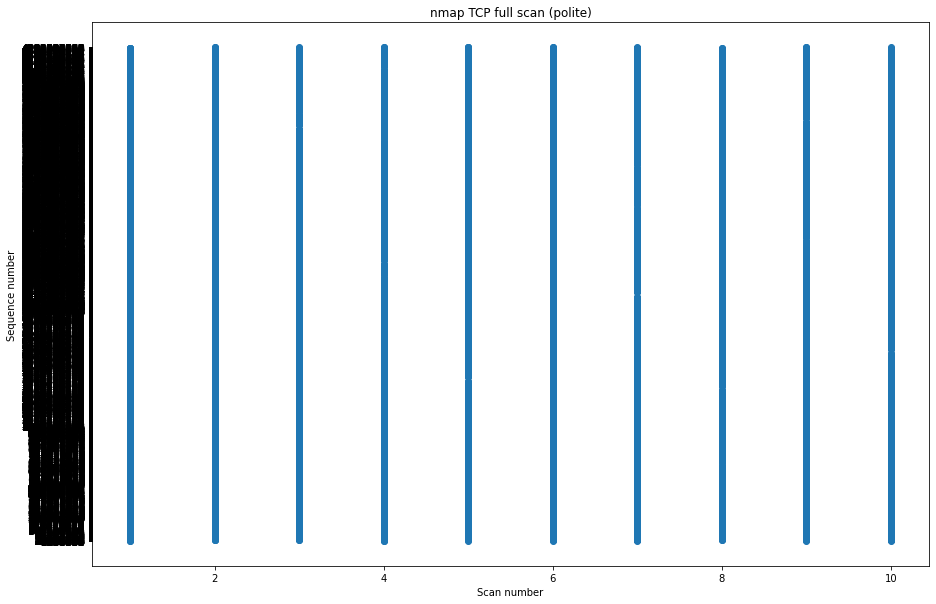

In [32]:
sequences = []
scan_number = []
scan_nr = 0
dst_ports = []
src_ports = []

for row in scan_list:
    scan_nr = scan_nr + 1
    for x in range(0, len(row)):
        if row['ip_src'][x] == scanner_ip:

            if scan['ip_proto'][x] == 6: # tcp
                sequences.append(row['tcp_seq'][x])
                dst_ports.append(row['tcp_dport'][x])
                src_ports.append(row['tcp_sport'][x])
            elif scan['ip_proto'][x] == 1: # icmp
                sequences.append(row['icmp_seq'][x])

            scan_number.append(scan_nr)


x = scan_number
ys = sequences

plt.xlabel('Scan number')
plt.ylabel('Sequence number')
plt.title(scan_title)
yvals = []
for y in set(ys):
    yvals.append(int(y))

plt.yticks(yvals, yvals)
plt.scatter(x, ys)
plt.savefig(directory + '/SeqNrScanNr.png')
plt.show()


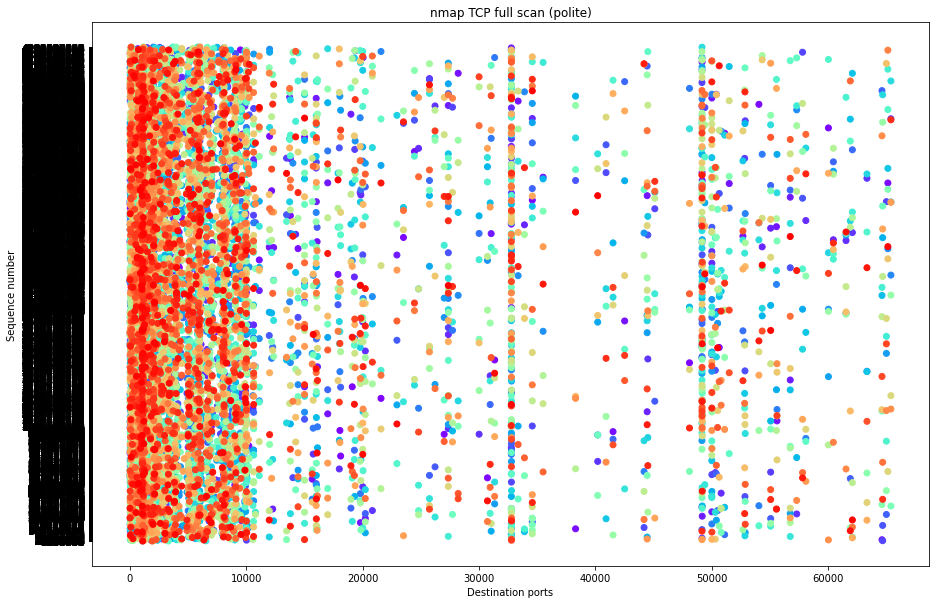

In [33]:
if dst_ports:
    x = dst_ports
    ys = sequences
    colors = cm.rainbow(np.linspace(0, 1, len(ys)))
    plt.xlabel('Destination ports')
    plt.ylabel('Sequence number')
    plt.title(scan_title)
    yvals = []
    for y in set(ys):
        yvals.append(int(y))

    plt.yticks(yvals, yvals)
    plt.scatter(x, ys, color=colors)
    plt.savefig(directory + '/SeqNrDstPort.png')
    plt.show()

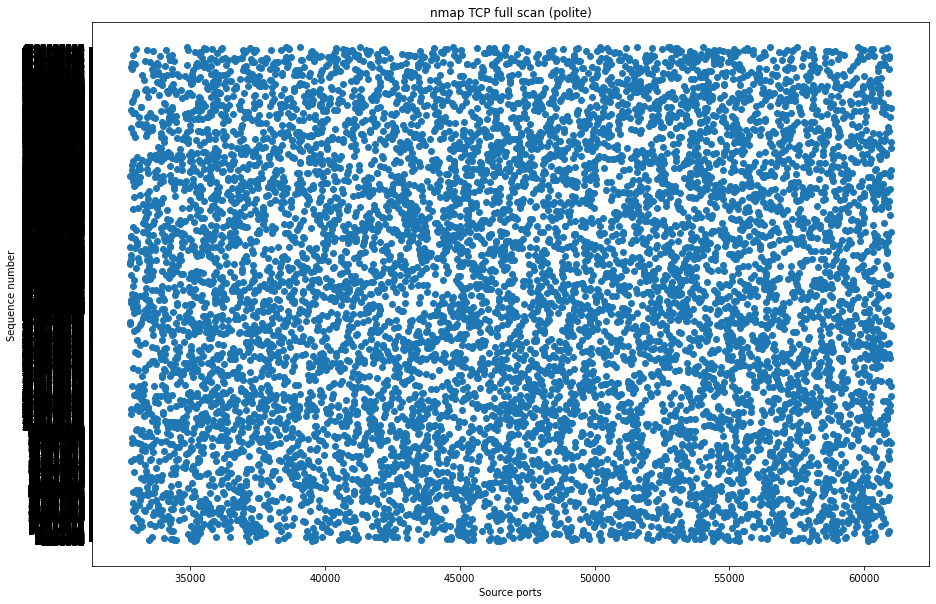

In [34]:
if src_ports:
    x = src_ports
    ys = sequences
    plt.xlabel('Source ports')
    plt.ylabel('Sequence number')
    plt.title(scan_title)
    yvals = []
    for y in set(ys):
        yvals.append(int(y))

    plt.yticks(yvals, yvals)
    plt.scatter(x, ys)
    plt.savefig(directory + '/SeqNrSrcPort.png')
    plt.show()


In [35]:
len(set(orders_port['sport']))

7144

## Flags

In [36]:
for scan in scan_list:
    for x in range(0, len(scan)):
        if scan['ip_src'][x] == scanner_ip:
            
            if scan['ip_proto'][x] == 6: # tcp
                flags = scan['tcp_flags'][x]
            elif scan['ip_proto'][x] == 14 or scan['ip_proto'][x] == 1: # udp and icmp
                flags = scan['ip_flags'][x]
            else:
                flags = None

            if flags:
                print(f"Flags: {flags}")
            
    print("-----")

Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
F

Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
F

Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
-----
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flag

Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
F

Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
F

Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
F

Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
F

Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
F